# **Import Libraries**

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Load the Data**

In [2]:
base_dir = '/content/drive/My Drive/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'val')

In [3]:
print("content of train folder:",os.listdir(train_dir))
print("content of val folder:",os.listdir(val_dir))

content of train folder: ['rock', 'scissors', 'paper']
content of val folder: ['scissors', 'paper', 'rock']


# **Data Preview**

In [4]:
import glob
import matplotlib.pyplot as plt

def images_preview(x):
  a = glob.glob(x)

  w=10
  h=10
  fig=plt.figure(figsize=(8, 8))
  columns = 3
  rows = 1
  for i in range(1, columns*rows +1):
      img = plt.imread(a[i])
      fig.add_subplot(rows, columns, i)
      plt.imshow(img)
  plt.show()

images preview of rock train


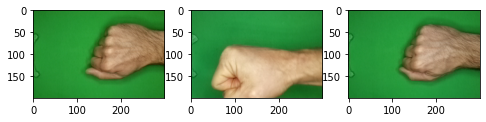


images preview of scissors train


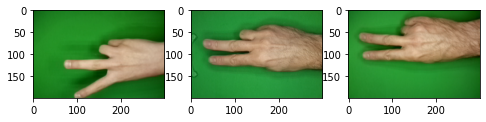


images preview of paper train


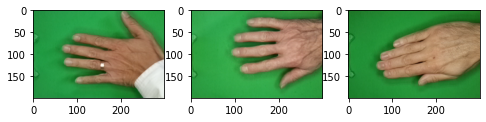

In [5]:
print("images preview of rock train")
images_preview("/content/drive/My Drive/rockpaperscissors/train/rock/*")
print("\nimages preview of scissors train")
images_preview("/content/drive/My Drive/rockpaperscissors/train/scissors/*")
print("\nimages preview of paper train")
images_preview("/content/drive/My Drive/rockpaperscissors/train/paper/*")

images preview of rock val


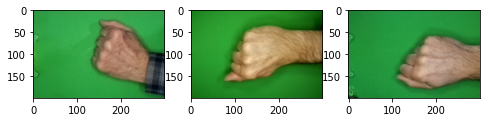


images preview of scissors val


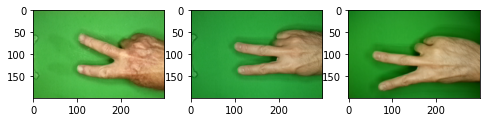


images preview of paper val


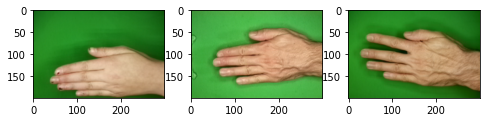

In [6]:
print("images preview of rock val")
images_preview("/content/drive/My Drive/rockpaperscissors/val/rock/*")
print("\nimages preview of scissors val")
images_preview("/content/drive/My Drive/rockpaperscissors/val/scissors/*")
print("\nimages preview of paper val")
images_preview("/content/drive/My Drive/rockpaperscissors/val/paper/*")

# **Define Data Train and Test**

In [7]:
train_paper_dir = os.path.join(train_dir, 'paper')
train_rock_dir = os.path.join(train_dir, 'rock')
train_scissors_dir = os.path.join(train_dir, 'scissors')

vaidation_paper_dir = os.path.join(val_dir, 'paper')
vaidation_rock_dir = os.path.join(val_dir, 'tock')
vaidation_scissors_dir = os.path.join(val_dir, 'scissors')

# **Image Augmentation**

In [8]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (64, 64),
    batch_size = 4,
    class_mode = 'categorical')
validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (64, 64),
    batch_size = 4,
    class_mode = 'categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# **Function to Visualize Accuracy and Loss**

In [26]:
plt.style.use('seaborn-whitegrid')

def plot_acc(history):
  acc = history.history['categorical_accuracy']
  val_acc = history.history['val_categorical_accuracy']
  epochs = range(len(acc))
  plt.subplot(1, 2, 1)
  acc_plot, = plt.plot(epochs, acc, 'r')
  val_acc_plot, = plt.plot(epochs, val_acc, 'b')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])


def plot_loss(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plt.subplot(1, 2, 2)
  loss_plot, = plt.plot(epochs, loss, 'r')
  val_loss_plot, = plt.plot(epochs, val_loss, 'b')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

def plot_graph(history):
  plt.figure(figsize=(15,5))
  plot_acc(history)
  plot_loss(history)

# **Define CNN Model**

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# **Run the Model**

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['categorical_accuracy'])

In [24]:
accuracy_graph = model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/20
50/50 [==============================] - 7s 129ms/step - loss: 1.1035 - categorical_accuracy: 0.3400 - val_loss: 1.0945 - val_categorical_accuracy: 0.3550
Epoch 2/20
50/50 [==============================] - 5s 103ms/step - loss: 1.0241 - categorical_accuracy: 0.4650 - val_loss: 0.9330 - val_categorical_accuracy: 0.5050
Epoch 3/20
50/50 [==============================] - 6s 119ms/step - loss: 0.6268 - categorical_accuracy: 0.7450 - val_loss: 0.7984 - val_categorical_accuracy: 0.6300
Epoch 4/20
50/50 [==============================] - 5s 98ms/step - loss: 0.4531 - categorical_accuracy: 0.8250 - val_loss: 0.2680 - val_categorical_accuracy: 0.8900
Epoch 5/20
50/50 [==============================] - 6s 112ms/step - loss: 0.3727 - categorical_accuracy: 0.8500 - val_loss: 0.2644 - val_categorical_accuracy: 0.8900
Epoch 6/20
50/50 [==============================] - 5s 103ms/step - loss: 0.4115 - categorical_accuracy: 0.8250 - val_loss: 0.2996 - val_categorical_accuracy: 0.8750
Epoch

# **Visualize The Accuracy**

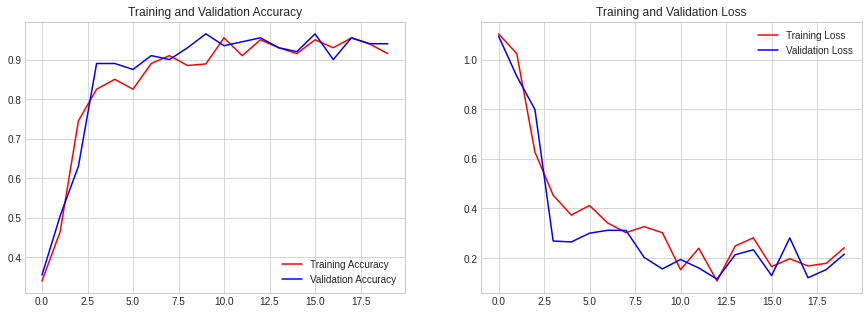

In [27]:
plot_graph(accuracy_graph)

# **Predict Image**

In [28]:
def switch_dict_key_values(this_dict):
    return dict((v,k) for k,v in this_dict.items())

train_data_label = switch_dict_key_values(train_generator.class_indices)
print(train_data_label)

{0: 'paper', 1: 'rock', 2: 'scissors'}


Saving 0CSaM2vL2cWX6Cay.png to 0CSaM2vL2cWX6Cay.png


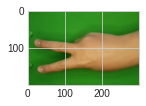

0CSaM2vL2cWX6Cay.png
Predicted as  [2] labeled as  scissors


In [29]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn

  def show(ini):
    fig = plt.figure(figsize=(2, 2))
    img = plt.imread(ini)
    plt.imshow(img)
    plt.show()

  show(path)
  img = image.load_img(path, target_size = (64, 64))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)

  result = np.argmax(model.predict(img), axis=-1)
  
  print(fn)
  if result==0:
    label = "paper"
  elif result==1:
    label = "rock"
  else:
    label = "scissors"

  print("Predicted as ", result, "labeled as ",label)